<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>


# Project 2: Catalan numbers

<div markdown=1 class=Abstract>

* 30% Recursion
* 20% Combinatorics
* 20% Asymptotics
* 20% SymPy
* 10% Generating functions


## Table of contents

- [Computing Catalan numbers](#Computing)
- Dealing with large Catalan numbers
  * [Length of Catalan numbers](#Asymptotics)
- [Catalan and generating functions](#CatalanGF)
- [Combinatorial interpretations of Catalan numbers](#Combinatorial)
  * [Paths in a triangle](#Triangle)
  * [Well-formed parentheses expressions](#Parentheses)
  * [Binary trees](#Trees)
- [Catalan and modulos: the Bostan Conjecture](#Bostan)
- [Closed Formula](#closed)
- [More on asymptotic analysis](#Asymptotics2)
- [Divisibility of Catalan numbers](#divisible)
- [Miscellaneous](#Miscellaneous)

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/customProject.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


Here are two cells that you can copy/paste throughout the Notebook:

<div markdown=1 class="Answers"> 
<i>Your answer.</i>

<div markdown=1 class="Prop"> 
<i>In this cell you can add your own additional questions (math or python).</i>

<a id="Computing"></a>
# Computing Catalan numbers

The <a href="https://en.wikipedia.org/wiki/Catalan_number">Catalan numbers</a> $c_0,c_1,c_2,\dots$ are defined recursively as follows:
\begin{align*}
c_0&=1\\
c_1&=1\\
c_n&=\sum_{k=0}^{n-1} c_kc_{n-1-k}=c_0c_{n-1}+c_1c_{n-2}+\dots +c_{n-1}c_0 \qquad (\text{ for }n\geq 2). \tag{$\star$}
\end{align*}
For instance,
\begin{align*}
c_2&=c_0c_1+c_1c_0=1\times 1+1\times 1=2,\\
c_3&=c_0c_2+c_1c_1+c_2c_0=1\times 2+1\times 1+2\times 1=5,\\
\dots
\end{align*}


<div markdown=1 class="DoIt"> 

1. Write a recursive function `CatalanRecursive(n)` which returns the $n$-th Catalan number.
2. Write a non recursive function `CatalanNotRecursive(n)` which returns the $n$-th Catalan number.<br>
<i>(You must also use recursive formula ($\star$) but your function `CatalanNotRecursive(n)` should not call itself.)</i>

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Recursive Algorithm $c_n$:

In [3]:
def CatalanRecursive(n):
    if n <= 1:
        return 1
    S = 0
    for k in range(n):
        S += CatalanRecursive(k)*CatalanRecursive(n-1-k)
    return S

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
DP Algorithm $c_n$:

In [4]:
def CatalanNotRecursive(n):
    c = [1,1]
    for k in range(2,n+1):
        c.append(0)
        for i in range(k):
            c[-1] += c[i]*c[k-i-1]
    return c[-1]

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Storage of Catalan numbers in $\texttt{Cat}$:

In [58]:
Cat = [1,1]
def CatalanFillTable(n):
    for k in range(2,n+1):
        Cat.append(0)
        for i in range(k):
            Cat[-1] += Cat[i]*Cat[k-i-1]
CatalanFillTable(1000)

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Checking the implementation of algorithms:

In [59]:
N = 10
for n in range(N):
    print(f"c_{n} = {CatalanRecursive(n)}, {CatalanNotRecursive(n)}")

c_0 = 1, 1
c_1 = 1, 1
c_2 = 2, 2
c_3 = 5, 5
c_4 = 14, 14
c_5 = 42, 42
c_6 = 132, 132
c_7 = 429, 429
c_8 = 1430, 1430
c_9 = 4862, 4862


<div markdown=1 class="DoIt"> 
Compare the execution times of your different functions computing the Catalan numbers (say, for $1\leq n\leq 15$).<br>
You can import the `time` library:

```
import time
```

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Comparing the algorithms:

In [60]:
import time

N = 17
print(f'N = {N}')
start = time.time()
CatalanRecursive(N)
end = time.time()
print(f'Recursive Algorithm : {end - start}')

start = time.time()
CatalanNotRecursive(N)
end = time.time()
print(f'DP Algorithm : {end - start}')


N = 17
Recursive Algorithm : 3.795330047607422
DP Algorithm : 0.0


<div markdown=1 class="Rmk"><a id="EquationE"></a> 
It can be proved that for every $n$
$$
c_{n}=\frac{1}{n+1}\binom{2n}{n}. \tag{E}
$$
You may try to use this formula to write another non-recursive function which returns $c_n$. Yet the formula (E) will not be useful for the rest of the project.

<div markdown=1 class="Answers"> 
The proof of this formula will be presented at later.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Closed Formula Algorithm:

In [61]:
def CatalanClosed(n):
    return sympy.binomial(2*n,n)//(n+1)

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Comparing DP Algorithm with Closed Formula Algorithm:

In [62]:
import time

N = 1000
print(f'N = {N}')
start = time.time()
x = CatalanClosed(N)
end = time.time()
print(f'Closed Formula Algorithm : {end - start}')

start = time.time()
y = CatalanNotRecursive(N)
end = time.time()
print(f'DP Algorithm : {end - start}')

print(f'Value are equal : {x == y}')

N = 1000
Closed Formula Algorithm : 0.0
DP Algorithm : 0.23518967628479004
Value are equal : True


<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Filling the Table with Closed Formula Algorithm:

In [66]:
def CatalanFillTableClosed(n):
    return [CatalanClosed(i) for i in range(n+1)]
        
Cat = CatalanFillTableClosed(3000)

<a id="CatalanGF"></a>
# Catalan and generating functions

Let 
$$
\mathcal{C}(x)=\sum_{n\geq 0}c_n x^n=1+x+2x^2+5x^3+\dots
$$
denote the generating function of the Catalan numbers.

<div markdown=1 class="DoIt"> 

1. **(Theory)** Use the recursive formula [($\star$)](#Computing) to prove that $\mathcal{C}(x)$ is a solution of the following equation of degree two: <br>
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2. 
$$
<br>
(In this equation, $\mathcal{C}(x)$ is the unknown and $x$ is a parameter.)
2. Use SymPy to deduce a formula for $\mathcal{C}(x)$. What is the radius of convergence?

<div markdown=1 class="Answers"> 

First we can prove a straighforward lemma:

**Lemma.** Given two generating functions $A(x) = \sum_{n\geq0} a_nx^n$ and $B(x) = \sum_{n\geq0} b_nx^n$, then the generating of the product is given by 
$$C(x) = A(x)B(x) = \sum_{n\geq0}\Big(\sum_{k=0}^n a_kb_{n-k} \Big)x^n.$$
**Proof.**
We notice that if want to get the $n$-th coefficient of this generating function, we only need to consider "partial sums" of $A(x)$ and $B(x)$ until $x^n$, thus we only need to consider the $n$-th coefficient in $\Big(\sum_{k=0}^n a_kx^k\Big)\Big(\sum_{k=0}^n b_kx^k\Big)$, but now to get the $n$-th coefficient, we can take an element $x^k$ from the first part, and $x^{n-k}$. And thus we get what we wanted.

Using our Lemma for $\mathcal{C}(x)$ and $\mathcal{C}(x)$, we notice that:

$$\mathcal{C}(x)^2 = \sum_{n\geq0}\sum_{k=0}^n c_{k}c_{n-k} x^n = \sum_{n\geq0} c_{n+1}x_n,$$
thus
$$\mathcal{C}(x) = \sum_{n\geq0}c_nx^n = 1 + \sum_{n\geq 0}c_{n+1}x^{n+1} = 1 + x\mathcal{C}(x)^2.$$


<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Solving for $\mathcal{C}(x)$ by SymPy:

In [67]:
var('C x')
solve(C - 1 - x*C**2, C)

[(1 - sqrt(1 - 4*x))/(2*x), (sqrt(1 - 4*x) + 1)/(2*x)]

<div markdown=1 class="Answers"> 

Thus we have that two candidates for $\mathcal{C}(x)$ they are:
$$\frac{1-\sqrt{1-4x}}{2x} ~~~ \textrm{and} ~~~ \frac{1+\sqrt{1-4x}}{2x},$$
but we notice that for the first one, the limit as $x\to0$ is $\infty$, because it is the case of $\frac{2}{0}$. But we have that $C(0) = c_0 = 1$. Therefore we can exclude the second case, and thus have
$$\mathcal{C}(x) = \frac{1-\sqrt{1-4x}}{2x}$$
To calculate the radius of convergence, we notice that for $x=0$ there is no problem, because
$$\lim_{x\to0}\frac{1-\sqrt{1-4x}}{2x} = \lim_{x\to0} \frac{1-(1-2x+o(x))}{2x} = \lim_{x\to0} 1 + o(x) = 1.$$
Thus the only limitation is $1-4x \geq 0$, and thus $\rho_c= \frac{1}{4}$

Therefore we have $c_n \sim 4^n$, as $n\to\infty$.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Plotting asymptotics of $c_n$:

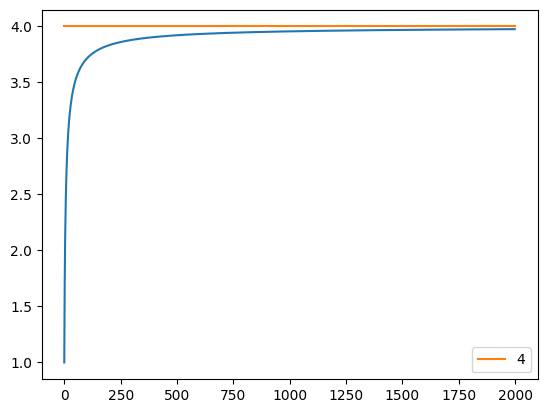

In [76]:
N=2000
RenormalizedValues=[Cat[n]**(1/(n+0.0)) for n in range(1,N)]
plt.plot(RenormalizedValues)
plt.plot([0,N],[4,4],label='4')

plt.legend()
plt.show()

<div markdown=1 class="DoIt"> You can deduce another program which computes the Catalan numbers using $\mathcal{C}(x)$, and compare the execution times with the functions of the first part of the Project.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Sympy Algorithm for $c_n$:

In [10]:
def CatalanSympy(n):
    if n == 0:
        return 1
    var('x')
    C = (1 - sqrt(1 - 4*x))/(2*x)
    return C.series(x,0,n+1).coeff(x**n) 

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Checking the implementation of algorithms:

In [11]:
N = 10
for n in range(N):
    print(f"c_{n} = {CatalanRecursive(n)}, {CatalanNotRecursive(n)}, {CatalanSympy(n)}")

c_0 = 1, 1, 1
c_1 = 1, 1, 1
c_2 = 2, 2, 2
c_3 = 5, 5, 5
c_4 = 14, 14, 14
c_5 = 42, 42, 42
c_6 = 132, 132, 132
c_7 = 429, 429, 429
c_8 = 1430, 1430, 1430
c_9 = 4862, 4862, 4862


<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Comparing the algorithms:

In [12]:
N = 100
print(f'N = {N}')
start = time.time()
CatalanNotRecursive(N)
end = time.time()
print(f'DP Algorithm : {end - start}')

start = time.time()
CatalanSympy(N)
end = time.time()
print(f'Sympy Algorithm : {end - start}')


N = 100
DP Algorithm : 0.0010378360748291016
Sympy Algorithm : 0.2790055274963379


### A variant: Motzkin numbers

The <i>Motzkin numbers</i> $m_0,m_1,m_2,\dots$ are similar to Catalan numbers and defined by $m_0=m_1=1$ and for every $n\geq 2$
$$
m_n=m_{n-1}+\sum_{k=0}^{n-2}m_km_{n-2-k}.
$$

<div markdown=1 class="DoIt"> 

**(Theory + SymPy)** 
1. Find the generating function $\mathcal{M}(x)=\sum_{n\geq 0}m_nx^n$. 
2. Compare the radius of convergence of $\mathcal{C}$ and $\mathcal{M}$. Which sequence is growing fastest between $(c_n)$ and $(m_n)$?

<div markdown=1 class="Answers"> 

We will use the **Lemma** of the product of generating function, we notice: $\mathcal{M}(x)^2 = \sum_{n\geq0}\big(\sum_{k=0}^n m_km_{n-k}\Big)x^n$, thus
$$\mathcal{M}(x) = \sum_{n\geq0} m_nx^n = 1 + x + \sum_{n\geq 0} m_{n+2}x^{n+2} = 1 + x + \sum_{n\geq0}\Big(m_{n+1} + \sum_{k=0}^{n}m_km_{n-k}\Big)x^{n+2} = 1 + x + x(\mathcal{M}(x) - 1) + x^2\mathcal{M}(x)^2$$
Thus
$$\mathcal{M}(x) = \frac{1+x^2\mathcal{M}(x)^2}{1-x}.$$
To compute the $\mathcal{M}(x)$ we can use quadratic formula, or use Sympy:

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Solving for $\mathcal{M}(x)$ with SymPy:

In [13]:
var('M x')
solve(M*(1-x) - 1 - x**2*M**2, M)

[(-x - sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2),
 (-x + sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2)]

<div markdown=1 class="Answers"> 

So we again have two candidates for the generating function $\mathcal{M}(x)$:
$$\frac{1-x-\sqrt{(1-3x)(x+1)}}{2x^2} ~~~~ \textrm{and} ~~~~ \frac{1-x+\sqrt{(1-3x)(x+1)}}{2x^2}$$
We again notice that the same argument as for Catalan numbers apply: if we consider the limit $x\to0$ for the second term, we have the form of $\frac{2}{0}$, which leads us to $\infty$. Thus leaving us with:
$$\mathcal{M}(x) =\frac{1-x-\sqrt{(1-3x)(x+1)}}{2x^2}$$
Let's calculate now the radius of convergence, we again notice that there is no problem at $x = 0$, because:
$$\lim_{x\to0}\frac{1-x-\sqrt{(1-3x)(x+1)}}{2x^2} \lim_{x\to0} \frac{1-x-\sqrt{1 - (2x+3x^2)}}{2x^2} = \lim_{x\to0} \frac{1-x-(1 - \frac{1}{2}(2x+3x^2) - \frac{1}{8}(2x+3x^2)^2 + o(x^3))}{2x^2}=$$
$$=\lim_{x\to0} \frac{\frac{3x^2}{2} + \frac{4x^2}{8} + o(x^2))}{2x^2} = \lim_{x\to0} 1 + o(1) = 1.$$
Hence the restriction of $x$ will be from $1-3x \geq 0$, and thus the radius of convergence is $\rho_m = \frac{1}{3}$.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Recursive Algorithm for $m_n$:

In [14]:
def MotzkinRecursive(n):
    if n <= 1:
        return 1
    S = 0
    for k in range(n-1):
        S += MotzkinRecursive(k)*MotzkinRecursive(n-2-k)
    return MotzkinRecursive(n-1) + S

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
DP Algorithm for $m_n$:

In [95]:
def MotzkinNotRecursive(n):
    m = [1,1]
    for i in range(2,n+1):
        m.append(0)
        m[-1] += m[-2]
        for k in range(i-1):
            m[-1] += m[k]*m[i-2-k]
    return m[-1]

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
DP Algorithm for $m_n$ (returning the list):

In [96]:
def MotzkinNotRecursiveList(n):
    m = [1,1]
    for i in range(2,n+1):
        m.append(0)
        m[-1] += m[-2]
        for k in range(i-1):
            m[-1] += m[k]*m[i-2-k]
    return m

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
SymPy Algorithm for $m_n$:

In [97]:
def MotzkinSympy(n):
    if n == 0:
        return 1
    var('x')
    C = (-x - sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2)
    return C.series(x,0,n+1).coeff(x**n) 

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Checking the implementation of algorithms:

In [99]:
N = 10
for n in range(N):
    print(f"m_{n} = {MotzkinRecursive(n)}, {MotzkinNotRecursive(n)}, {MotzkinSympy(n)}")

m_0 = 1, 1, 1
m_1 = 1, 1, 1
m_2 = 2, 2, 2
m_3 = 4, 4, 4
m_4 = 9, 9, 9
m_5 = 21, 21, 21
m_6 = 51, 51, 51
m_7 = 127, 127, 127
m_8 = 323, 323, 323
m_9 = 835, 835, 835


<div markdown=1 class="Answers"> 

From Asymptotics of GF in Toolbox 2, we have that $c_n$ grows like $(\frac{1}{\rho_c})^n = 4^n$ and $m_n$ grows like $(\frac{1}{\rho_m}) = 3^n$. So we would expect that $c_n$ grows a lot faster than $m_n$

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Plotting asymptotics of $m_n$:

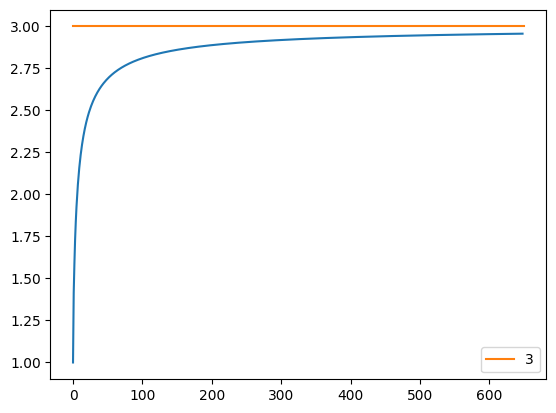

In [112]:
N=650
Motzkin = MotzkinNotRecursiveList(N)
RenormalizedValues=[Motzkin[n]**(1/(n+0.0)) for n in range(1,N)]
plt.plot(RenormalizedValues)
plt.plot([0,N],[3,3],label='3')

plt.legend()
plt.show()

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Growth comparison between $c_n$ and $m_n$:

In [113]:
N = 30
print(f"Comparing c_n and m_n")
for n in range(N):
    print(f"n = {n}: c_n = {CatalanNotRecursive(n)}, m_n = {MotzkinNotRecursive(n)}")

Comparing c_n and m_n
n = 0: c_n = 1, m_n = 1
n = 1: c_n = 1, m_n = 1
n = 2: c_n = 2, m_n = 2
n = 3: c_n = 5, m_n = 4
n = 4: c_n = 14, m_n = 9
n = 5: c_n = 42, m_n = 21
n = 6: c_n = 132, m_n = 51
n = 7: c_n = 429, m_n = 127
n = 8: c_n = 1430, m_n = 323
n = 9: c_n = 4862, m_n = 835
n = 10: c_n = 16796, m_n = 2188
n = 11: c_n = 58786, m_n = 5798
n = 12: c_n = 208012, m_n = 15511
n = 13: c_n = 742900, m_n = 41835
n = 14: c_n = 2674440, m_n = 113634
n = 15: c_n = 9694845, m_n = 310572
n = 16: c_n = 35357670, m_n = 853467
n = 17: c_n = 129644790, m_n = 2356779
n = 18: c_n = 477638700, m_n = 6536382
n = 19: c_n = 1767263190, m_n = 18199284
n = 20: c_n = 6564120420, m_n = 50852019
n = 21: c_n = 24466267020, m_n = 142547559
n = 22: c_n = 91482563640, m_n = 400763223
n = 23: c_n = 343059613650, m_n = 1129760415
n = 24: c_n = 1289904147324, m_n = 3192727797
n = 25: c_n = 4861946401452, m_n = 9043402501
n = 26: c_n = 18367353072152, m_n = 25669818476
n = 27: c_n = 69533550916004, m_n = 7300777280

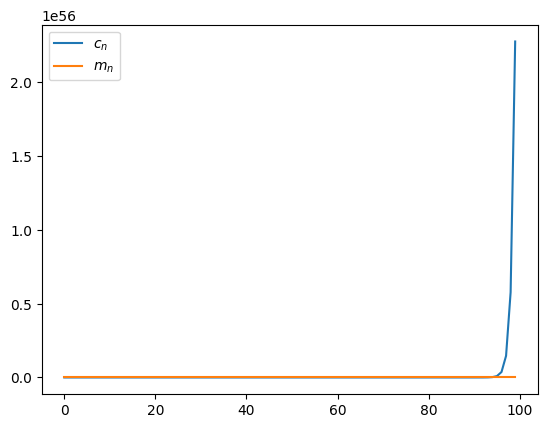

In [118]:
N = 100
Mot = MotzkinNotRecursiveList(N)

plt.plot([Cat[n] for n in range(N)], label='$c_n$')
plt.plot([Mot[n] for n in range(N)], label='$m_n$')

plt.legend()
plt.show()

<div markdown=1 class="Answers"> We notice that $m_n$ looks constant compared to $c_n$.

# Dealing with large Catalan numbers

<a id="Asymptotics"></a>
## The <i>length</i> of Catalan numbers

It can be proved (this is beyond the level of Bachelor 2, a possible reference is p.384 in Ph.Flajolet, R.Sedgewick, <i>Analytic Combinatorics</i>) that for every $n$ we have
$$
\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big) \leq c_n \leq \frac{4^n}{\sqrt{\pi n^3}}, \tag{App}
$$
which yields very good approximations when $n$ is large.
We will use this approximation to estimate the <i>length</i> (<i>i.e.</i> the number of digits) of $c_n$ when $n$  is a power of ten.

<div markdown=1 class="DoIt"> 
Consider the following table which records the <i>length</i> of $c_{10}$, $c_{100}$, $c_{1000}$,...


<font size="+3">
<table>
            <tr>
                <td width="100"> $c_{10^n}$</td>
                <td > Number of digits of $c_{10^n}$</td>
            </tr>
            <tr>
                <td width="100"> $c_{10}$</td>
                <td > 5</td>
            </tr>
            <tr>
                <td width="100"> $c_{100}$</td>
                <td > 57</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^3}$</td>
                <td > 598</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^4}$</td>
                <td > 6015</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^5}$</td>
                <td > 60199</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^6}$</td>
                <td > 602051</td>
            </tr>
</table>
</font>

(For instance, $c_{10}=16796$ which has $5$ digits.)

The goal is to complete the table. (An interesting challenge could be to break the record of <a href="https://oeis.org/A114466">this sequence in the Online Encyclopedia of Integer Sequences</a>!)<br>
For that purpose you have to
1. **(Theory)** Find somewhere (or reprove) the formula which gives the number of digits of a given integer.
2. Use this formula and python to complete the table. **Warning:** Do not try to explicitly compute $Cat_{10^n}$ since they grow too fast. Instead you need to figure out how to use equation (App) above.

<div markdown=1 class="Answers"> 

1. The number of digits of $n$ will be just $k = \lfloor\log_{10} n\rfloor + 1$, since $10^k \leq n < 10^{k+1}$.

2. Thus we need to can $\log_{10}$ both sides of the given inequality:
$$\log_{10}\Big(\frac{4^n}{\sqrt{\pi n^3}}\Big) + \log_{10}\Big(1-\frac{9}{8n}\Big) \leq \log_{10}(c_n) \leq \log_{10}\Big(\frac{4^n}{\sqrt{\pi n^3}}\Big) $$
$$ \iff n\log_{10}(4) - \frac{1}{2}\log_{10}(\pi n^3)+ \log_{10}\Big(1-\frac{9}{8n}\Big) \leq \log_{10}(c_n) \leq n\log_{10}(4) - \frac{1}{2}\log_{10}(\pi n^3) $$
$$ \iff n\log_{10}(4) - \frac{1}{2}\log_{10}(\pi) -\frac{3}{2}\log_{10}(n)+ \log_{10}\Big(1-\frac{9}{8n}\Big) \leq \log_{10}(c_n) \leq n\log_{10}(4) - \frac{1}{2}\log_{10}(\pi) -\frac{3}{2}\log_{10}(n)$$
We notice that for big $n$, the term $\log_{10}\Big(1-\frac{9}{8n}\Big)$ is a very small negative number, thus we can just take the floor of the right hand side and add $1$ to get the number of digits of $c_n$

If we set $n = 10^k$ then:
$$\left\lfloor 10^k\log_{10}(4) - \frac{1}{2}\log_{10}(\pi) -\frac{3}{2}k \right\rfloor + 1 = \lfloor\log_{10}(c_{10^k})\rfloor + 1$$

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Number of digits of $c_{10^n}$:

In [20]:
def c10digits(n):
    if n == 0:
        return 1
    return floor(10**n*log10(4) - log10(pi)/2 - 3*n/2) + 1

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Number of digits of $c_{10^n}$:

In [21]:
N = 18

A114466 = [1, 5, 57, 598, 6015, 60199, 602051, 6020590, 60205987, 602059978, 6020599899, 60205999117, 602059991310, 6020599913260, 60205999132775, 602059991327940, 6020599913279600, 60205999132796214]

for n in range(N):
    print(f"n = {n}: {c10digits(n)}, Expected: {A114466[n]}")

n = 0: 1, Expected: 1
n = 1: 5, Expected: 5
n = 2: 57, Expected: 57
n = 3: 598, Expected: 598
n = 4: 6015, Expected: 6015
n = 5: 60199, Expected: 60199
n = 6: 602051, Expected: 602051
n = 7: 6020590, Expected: 6020590
n = 8: 60205987, Expected: 60205987
n = 9: 602059978, Expected: 602059978
n = 10: 6020599899, Expected: 6020599899
n = 11: 60205999117, Expected: 60205999117
n = 12: 602059991310, Expected: 602059991310
n = 13: 6020599913260, Expected: 6020599913260
n = 14: 60205999132775, Expected: 60205999132775
n = 15: 602059991327940, Expected: 602059991327940
n = 16: 6020599913279601, Expected: 6020599913279600
n = 17: 60205999132796217, Expected: 60205999132796214


<div markdown=1 class="Answers"> 
We that we weren't able to calculate succesfully terms of $n = 16$ and $n = 17$, due to floating numbers and rounding errors in Python.

<div markdown=1 class="DoIt">  

**(Theory)** For larger and larger $n$'s the right column always begins with the same digits ($60205...$). Can you explain this pattern?

(<i>Hint: Again, you should use equation </i>(App)<i>.</i>)

<div markdown=1 class="Answers"> 

We notice that the dominating factor will be $10^k$ compared to $k$ and other constants, so we notice that at some point we will see digits from $\log_{10}(4)$, which we see it match the digits $60205\ldots$, because $\log_10(4) = 0.60205999\ldots$

In [22]:
print(log10(4))

0.6020599913279624


<a id="Combinatorial"></a>
# Three combinatorial interpretations of $c_n$

<a id="Triangle"></a>
## Paths on a triangle

Let $\mathcal{T}\subset \mathbb{N}^2$ denote the infinite "triangle"
$$
\mathcal{T}=\big\{(k,n),\quad 0\leq k\leq n \big\}
$$
(see the figure below).

For $(k,n) \in \mathcal{T}$ we denote by $P_{k,n}$ the number of paths such that:
* the path starts at $(0,0)$ ends at $(n,k)$ and entirely lies inside $\mathcal{T}$
* the paths only takes unit steps in the North and East directions.

For example this figure shows that $P_{2,3}=5$:

<img src="figures/Escalier.jpg" width='500px' >
    

<div markdown=1 class="DoIt"> 
1. Write a function `Paths(K,N)` which returns a table (or a matrix) of all the values of $P_{k,n}$ for $k\leq K, n\leq N$.<br>
<i>(Hint: Think recursive!)</i>
2. Do you see on your table the connection with the Catalan numbers? **(Difficult)** Can you prove it?

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Recursive algorithm for $\texttt{Paths}$:

In [23]:
def Paths(K,N):
    if K == 0 and N == 0: #if at beginning square
        return 1
    if K == N: #if on diagonal
        return Paths(K-1,N)
    if K == 0: #if on edge
        return 1
    return Paths(K-1,N) + Paths(K,N-1)

In [24]:
print(Paths(2,3))

5


In [25]:
N = 15
for n in range(N):
    print(f'n = {n} : Paths(n,n) = {Paths(n,n)}, c_n = {Cat[n]}')

n = 0 : Paths(n,n) = 1, c_n = 1
n = 1 : Paths(n,n) = 1, c_n = 1
n = 2 : Paths(n,n) = 2, c_n = 2
n = 3 : Paths(n,n) = 5, c_n = 5
n = 4 : Paths(n,n) = 14, c_n = 14
n = 5 : Paths(n,n) = 42, c_n = 42
n = 6 : Paths(n,n) = 132, c_n = 132
n = 7 : Paths(n,n) = 429, c_n = 429
n = 8 : Paths(n,n) = 1430, c_n = 1430
n = 9 : Paths(n,n) = 4862, c_n = 4862
n = 10 : Paths(n,n) = 16796, c_n = 16796
n = 11 : Paths(n,n) = 58786, c_n = 58786
n = 12 : Paths(n,n) = 208012, c_n = 208012
n = 13 : Paths(n,n) = 742900, c_n = 742900
n = 14 : Paths(n,n) = 2674440, c_n = 2674440


<div markdown=1 class="Answers"> 

We can prove that actually $\texttt{Paths(n,n)} = c_n$. We see that we can divide the path into two paths. First part is from $(0,0)$ to the first time we get into the diagonal again say: $(k,k)$. So We see that we have divided the path into two parts: From $(0,0) \to (k,k)$ and from $(k+1,k)\to(n,n-1)$. We see then we have a path of the same type of length $k$ and a path of the same type of length $n-k-1$, and thus we get the formula:
$$
\texttt{Paths(n,n)} = \sum_{k=0}^{n-1} \texttt{Paths(k,k)}\cdot\texttt{Paths(n-k-1,n-k-1)},
$$
with $\texttt{Paths(0,0)}= \texttt{Paths(1,1)} = 1$. So we conclude that $\texttt{Paths(n,n)} = c_n$ (by induction).

<a id="Parentheses"></a>
##  Well-formed parentheses expressions

It can be shown that $c_n$ counts the number of expressions containing $n$ pairs of parentheses which are <i>correctly matched</i>. For the first values we obtain
$$
\begin{array}{r c c c c c}
n=1: & ()   &       &     &     &      \\
n=2: & (()) & ()()  &     &     &      \\
n=3: & ((())) & (())()  &  ()(())    &  ()()()   &  (()())    \\
\end{array}
$$

<div markdown=1 class="DoIt"> 
1. Write a recursive function `Parentheses(n)` which returns the list of all well-formed parentheses expressions with $n$ pairs of parentheses.
2. Check for different values that the list has length $c_n$.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Recursive algorithm for $\texttt{Parentheses}$:

In [26]:
def Parentheses(n,l=None,r=None):
    if l is None: #initializing l = nb of left parentheses, r = nb of right parentheses
        l = n
        r = n
    if r < l or r < 0 or l < 0: #if we wanted to pick more than n left or right parentheses/ or if we put a right parentheses before a left one.
        return 0
    if l == 0 and r == 0: #if we don't have any more parentheses, we found a well-formed parentheses expression.
        return 1
    return Parentheses(n,l-1,r) + Parentheses(n,l,r-1) #we either put a left or right parentheses

In [27]:
N = 15
for n in range(N):
    print(f'n = {n} : Parentheses(n) = {Parentheses(n)}, c_n = {Cat[n]}')

n = 0 : Parentheses(n) = 1, c_n = 1
n = 1 : Parentheses(n) = 1, c_n = 1
n = 2 : Parentheses(n) = 2, c_n = 2
n = 3 : Parentheses(n) = 5, c_n = 5
n = 4 : Parentheses(n) = 14, c_n = 14
n = 5 : Parentheses(n) = 42, c_n = 42
n = 6 : Parentheses(n) = 132, c_n = 132
n = 7 : Parentheses(n) = 429, c_n = 429
n = 8 : Parentheses(n) = 1430, c_n = 1430
n = 9 : Parentheses(n) = 4862, c_n = 4862
n = 10 : Parentheses(n) = 16796, c_n = 16796
n = 11 : Parentheses(n) = 58786, c_n = 58786
n = 12 : Parentheses(n) = 208012, c_n = 208012
n = 13 : Parentheses(n) = 742900, c_n = 742900
n = 14 : Parentheses(n) = 2674440, c_n = 2674440


<div markdown=1 class="DoIt"> **(Theory)** Prove that the number of well-formed parentheses expressions is counted by Catalan numbers.

<div markdown=1 class="Answers"> 

We can prove that number of correct parentheses count the Catalan number, by using the recursive formula. We notice that we can divide a parenthesation, into two parts, by choosing the first pair of parenthesation as the "boarder", i.e. $(A)B$, where $A$ and $B$ are some well-formed parentheses. Thus we see that the sum of number of pairs of parentheses of $A$ and $B$ is exactly $n-1$. And we also notice that the partition can be anywhere from index $0$ to $n-1$, thus we have
$$P_n = \sum_{k=0}^{n-1}P_{k}P_{n-1-k},$$
where $P_0=P_1=1$. We easily notice that this sequence is the same as Catalan numbers, one can easily prove it by induction.

Other way to prove this fact, is to find a bijection between the paths defined above.

We notice that each left parentheses $'('$ can be represented as a step in the North, and each right parentheses $')'$ can be represented as a step in the East. Thus we have a bijection between these two objects. We notice that each path won't cross the diagonal, because we have at most $')'$ number of $'('$, to have a well-formed parethesations. Likewise for each path not crossing the diagonal, we guarantee that there won't be an extra $')'$ that doesn't have a opening parentheses.

<a id="Trees"></a>
## Binary trees

A <i>binary tree</i> is a tree in which every internal node (in grey in above pictures) has exactly two children. Leaves (in green) have no children. The **size** of a binary tree is its number of internal nodes. There is one binary tree of size $1$, and two binary trees of size $2$, five binary trees of size $3$:
<br>
<img src="./figures/BinaryTree.jpg" style="width: 700px;"/>

Let $t_n$ be the number of binary trees of size $n$, by convention we put $t_0=1$ (this corresponds to a leaf without any internal node).

<div markdown=1 class="DoIt"> 
**(Theory)** Prove that $t_n$ is the $n$-th Catalan number.

<div markdown=1 class="Answers"> 

This again can be proved multiple ways:

Direct: Looking from the root, we see that the tree can be decomposed into two binary trees, which are rooted on the left child and the right child. We notice then that if the original tree has size $n$, then the sum of sizes of the trees is $n-1$. Therefore we notice again the recurrence relation:

$$B_n = \sum_{k=0}^{n-1} B_k B_{n-1-k}.$$

With $B_0 = B_1 = 1$, which again prove that $B_n$ count the Catalan numbers.

This also can be proved by bijection between well-formed parethesations. We notice that if consider a DFS search on the tree starting from the root, and we always visit the left child first. Then we are able to order the edges in the tree.

Then we can define a left edge as a open parentheses $'('$, and a right edge as closed parentheses $')'$. Therefore we can see in the example of size $3$ we will map the trees with:
$$(())(), ~~ ()(()), ~~ ()()(), ~~ ((())), ~~ (()()).$$

<a id="Bostan"></a>
## Catalan and modulos: the Bostan Conjecture

<div markdown=1 class="DoIt"> 

Alin Bostan (computer scientist at INRIA and Ecole Polytechnique) conjectured a few years ago <a href="http://www.mat.univie.ac.at/%7Eslc/wpapers/s80vortrag/bostan.pdf">(see this link p.26)</a> that in basis 10 the last digit of $c_n$ is never $3$. So far this is still an open problem.<br>

1. Check the conjecture for $1\leq n\leq 100$. The output should look like
```python
Catalan 1 mod 10 is 1: the Conjecture is True
Catalan 2 mod 10 is 2: the Conjecture is True
Catalan 3 mod 10 is 5: the Conjecture is True
Catalan 4 mod 10 is 4: the Conjecture is True
...
```
2. How to check the conjecture for very large values? Try for example with $7000\leq n\leq 7100$.<br>
<i>(Hint: Be careful how you compute $c_n \mod 10$, since $c_n$ grows very fast!)</i>
3. More generally, what is the frequency of $0,1,\dots,9$ among last digits of the $n$ first Catalan numbers?
4. What about the conjecture in basis other than basis 10?

In [28]:
for n in range(1,101):
    print(f"Catalan {n} mod {10} is {CatalanNotRecursive(n)%10}: the Conjecture is {CatalanNotRecursive(n)%10 != 3}")

Catalan 1 mod 10 is 1: the Conjecture is True
Catalan 2 mod 10 is 2: the Conjecture is True
Catalan 3 mod 10 is 5: the Conjecture is True
Catalan 4 mod 10 is 4: the Conjecture is True
Catalan 5 mod 10 is 2: the Conjecture is True
Catalan 6 mod 10 is 2: the Conjecture is True
Catalan 7 mod 10 is 9: the Conjecture is True
Catalan 8 mod 10 is 0: the Conjecture is True
Catalan 9 mod 10 is 2: the Conjecture is True
Catalan 10 mod 10 is 6: the Conjecture is True
Catalan 11 mod 10 is 6: the Conjecture is True
Catalan 12 mod 10 is 2: the Conjecture is True
Catalan 13 mod 10 is 0: the Conjecture is True
Catalan 14 mod 10 is 0: the Conjecture is True
Catalan 15 mod 10 is 5: the Conjecture is True
Catalan 16 mod 10 is 0: the Conjecture is True
Catalan 17 mod 10 is 0: the Conjecture is True
Catalan 18 mod 10 is 0: the Conjecture is True
Catalan 19 mod 10 is 0: the Conjecture is True
Catalan 20 mod 10 is 0: the Conjecture is True
Catalan 21 mod 10 is 0: the Conjecture is True
Catalan 22 mod 10 is 0

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
DP Algorithm modulo $10$:

In [29]:
def CatalanNotRecursiveMod10ConjectureCheck(A,B):
    c = [1,1]
    for k in range(2,B+1):
        c.append(0)
        for i in range(k):
            c[-1] += (c[i]*c[k-i-1])%10
        c[-1] %= 10
    for n in range(A,B+1):
        print(f"Catalan {n} mod {10} is {c[n]%10}: the Conjecture is {c[n]%10 != 3}")

In [30]:
CatalanNotRecursiveMod10ConjectureCheck(7000,7100)

Catalan 7000 mod 10 is 4: the Conjecture is True
Catalan 7001 mod 10 is 4: the Conjecture is True
Catalan 7002 mod 10 is 8: the Conjecture is True
Catalan 7003 mod 10 is 0: the Conjecture is True
Catalan 7004 mod 10 is 6: the Conjecture is True
Catalan 7005 mod 10 is 8: the Conjecture is True
Catalan 7006 mod 10 is 8: the Conjecture is True
Catalan 7007 mod 10 is 6: the Conjecture is True
Catalan 7008 mod 10 is 0: the Conjecture is True
Catalan 7009 mod 10 is 8: the Conjecture is True
Catalan 7010 mod 10 is 4: the Conjecture is True
Catalan 7011 mod 10 is 4: the Conjecture is True
Catalan 7012 mod 10 is 8: the Conjecture is True
Catalan 7013 mod 10 is 0: the Conjecture is True
Catalan 7014 mod 10 is 0: the Conjecture is True
Catalan 7015 mod 10 is 0: the Conjecture is True
Catalan 7016 mod 10 is 0: the Conjecture is True
Catalan 7017 mod 10 is 0: the Conjecture is True
Catalan 7018 mod 10 is 0: the Conjecture is True
Catalan 7019 mod 10 is 0: the Conjecture is True
Catalan 7020 mod 10 

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Distribution of digits:

{0: 2672, 1: 2, 2: 96, 3: 0, 4: 109, 5: 6, 6: 48, 7: 1, 8: 64, 9: 3}


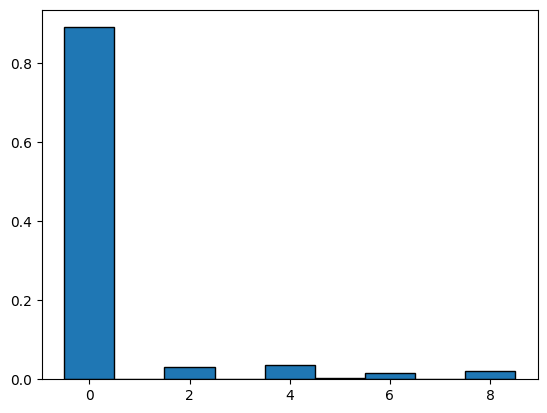

In [31]:
def CatalanNotRecursiveMod10returnList(A,B):
    c = [1,1]
    for k in range(2,B+1):
        c.append(0)
        for i in range(k):
            c[-1] += (c[i]*c[k-i-1])%10
        c[-1] %= 10
    return c

N = 3000
Y=sorted(CatalanNotRecursiveMod10returnList(1,N))
plt.hist(Y, bins= [k-0.5 for k in range(10)], density=True, ec='k')
print({k: Y.count(k) for k in range(10)})
plt.show()

<div markdown=1 class="Answers"> 

We notice that the (dominating) majority of last digits of the Catalan numbers is $0$, we notice some occurence of $2,4,6$ and $8$, while odd numbers are barely occuring.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
The Conjecture in different bases:

{0: 2989, 1: 12}


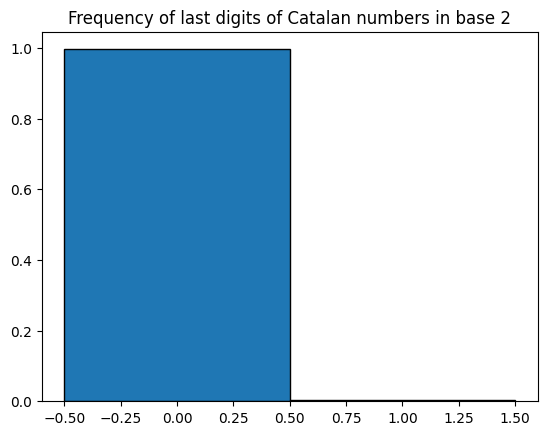

{0: 2685, 1: 157, 2: 159}


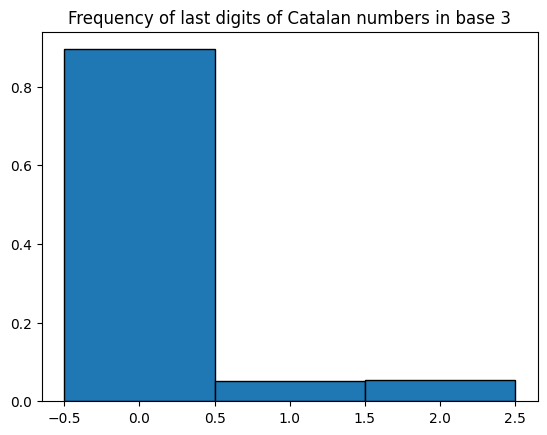

{0: 2924, 1: 12, 2: 65, 3: 0}


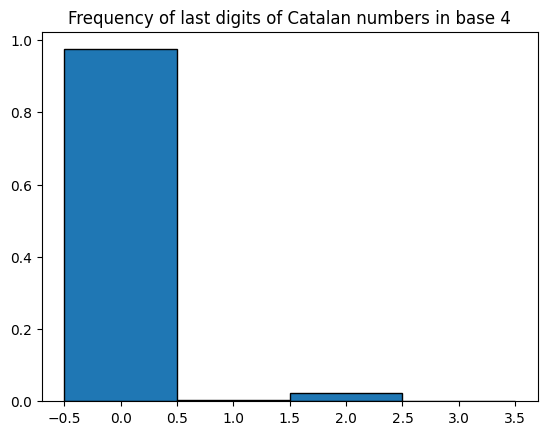

{0: 2678, 1: 50, 2: 97, 3: 64, 4: 112}


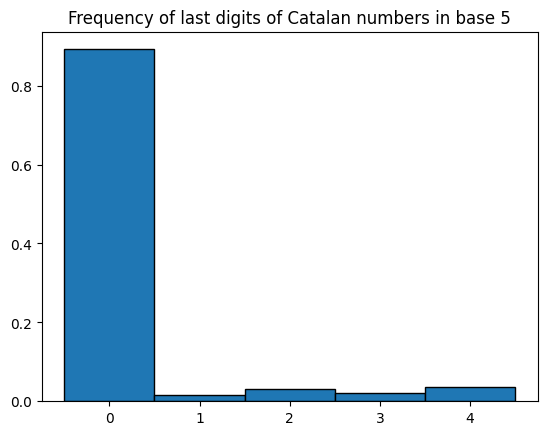

{0: 2678, 1: 3, 2: 157, 3: 7, 4: 154, 5: 2}


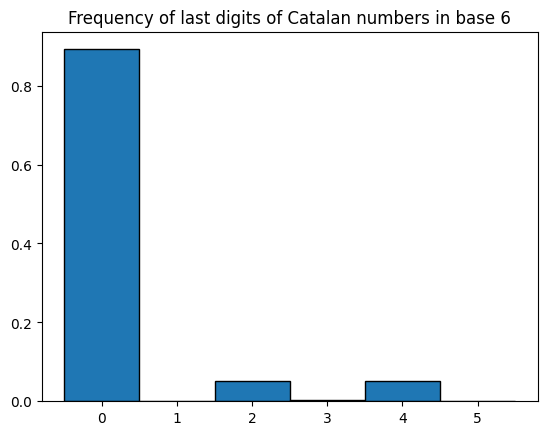

{0: 2522, 1: 74, 2: 91, 3: 81, 4: 75, 5: 77, 6: 81}


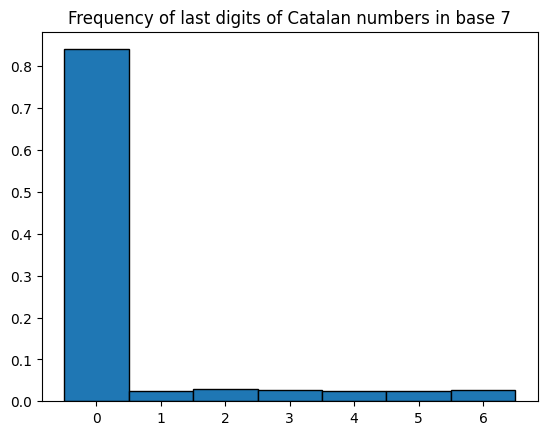

{0: 2714, 1: 2, 2: 10, 3: 0, 4: 210, 5: 10, 6: 55, 7: 0}


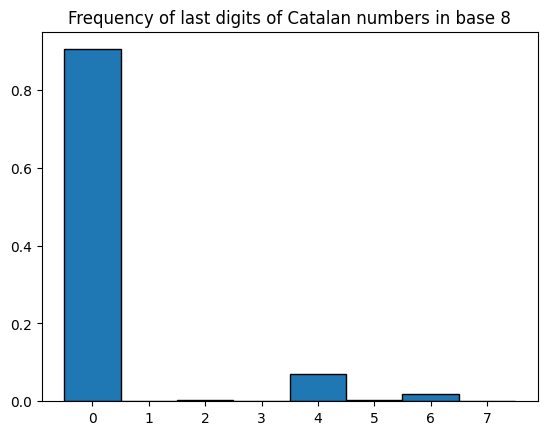

{0: 2181, 1: 50, 2: 54, 3: 252, 4: 56, 5: 50, 6: 252, 7: 51, 8: 55}


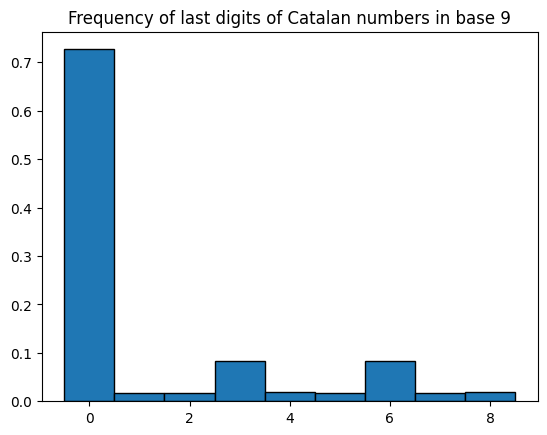

{0: 2672, 1: 2, 2: 96, 3: 0, 4: 109, 5: 6, 6: 48, 7: 1, 8: 64, 9: 3}


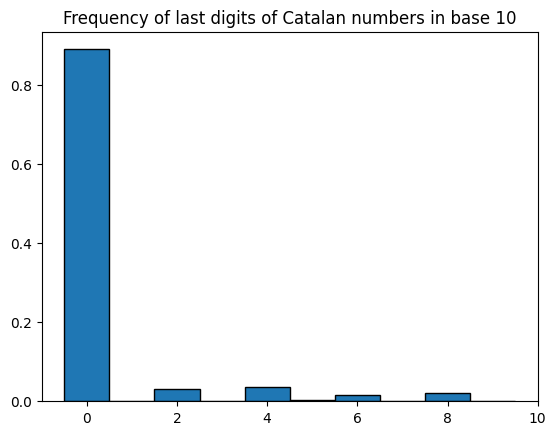

{0: 2372, 1: 62, 2: 67, 3: 61, 4: 68, 5: 56, 6: 62, 7: 61, 8: 59, 9: 67, 10: 66}


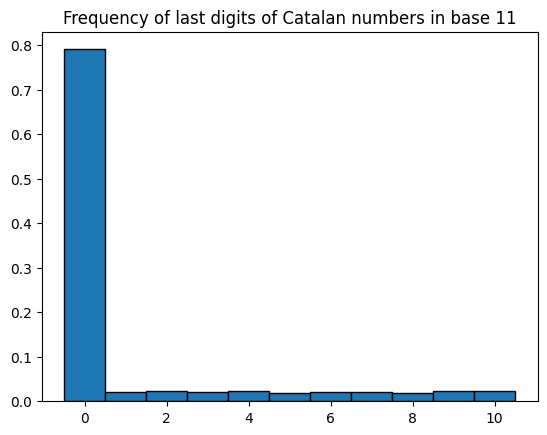

{0: 2625, 1: 3, 2: 6, 3: 0, 4: 148, 5: 2, 6: 53, 7: 0, 8: 151, 9: 7, 10: 6, 11: 0}


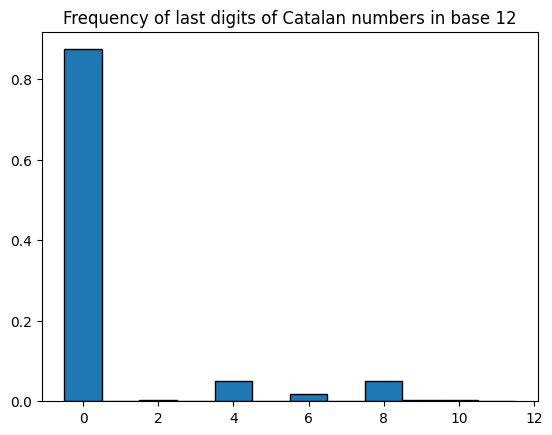

In [32]:
def CatalanNotRecursiveModreturnList(A,B,m):
    c = [1,1]
    for k in range(2,B+1):
        c.append(0)
        for i in range(k):
            c[-1] += (c[i]*c[k-i-1])%m
        c[-1] %= m
    return c

def showPlotBaseM(N,M):
    Y=sorted(CatalanNotRecursiveModreturnList(1,N,M))
    plt.hist(Y, bins= [k-0.5 for k in range(M+1)], density=True, ec='k')
    print({k: Y.count(k) for k in range(M)})
    plt.title("Frequency of last digits of Catalan numbers in base " + str(M))
    plt.show()

for i in range(2,13):
    showPlotBaseM(3000,i)

<div markdown=1 class="Answers"> 

We notice that for bases like $4,8,12$ we have the same conjecture as for the base $10$. However for most of the bases, we notice that each digit has appeared couple of times in $C_1,\ldots,C_{3000}$. We also notice that there the distribution of last digits in any bases are mostly in $0$.

I would like to conjecture that Catalan numbers in any base $n$, will have a probability of the last digit being zero, near to $1$. 

That is for any given $N$, $c_n$ is most likely to divisible by $N$, as $n$ tends to infinity. (This conjecture is most likely true for prime numbers)

<a id="closed"></a>
## Closed Formula

We notice that there is another formula for Catalan numbers, which is:
$$c_n = \frac{1}{n+1}\binom{2n}{n}$$
We will prove it in two ways: a combinatorial way, and an analytic way

<div markdown=1 class="Prop"> Combinatorial Way. Part 1

Prove that the number of paths from $(0,0)$ to $(k,n)$ using moves $(1,0)$ and $(0,1)$ is:
$$\binom{k+n}{n}.$$


<div markdown=1 class="Answers"> 

We will have $k$ moves $(1,0)$ and $n$ moves $(0,1)$. And we see that the paths can be constructed as some order of moves. So we can order $k$ moves $(1,0)$ in $k+n$ places, and thus we have $\binom{k+n}{n}$ ways to construct the paths.

<div markdown=1 class="Prop"> Combinatorial Way. Part 2

Prove that the Catalan number is equal to 
$$c_n = \binom{2n}{n} - \binom{2n}{n-1} = \frac{1}{n+1} \binom{2n}{n}.$$

<div markdown=1 class="Answers"> 

We notice that the Catalan numbers count the number of paths from $(0,0)$ to $(n,n)$, and not crossing the diagonal (The first interepretation of Catalan numbers). Thus if we want to find these paths, we need to eliminate paths from $(0,0)$ to $(n,n)$, which cross the diagonal. We can charaterize it with the paths that at some point the paths intersect the line $y = x-1$ (one below the diagonal). Thus we notice that if we reflect that path from the point of intersection to the end, w.r.t. to the line $y = x-1$, then we will get:
A path from $(0,0)$ to $(n+1,n-1)$ using moves $(0,1)$ and $(1,0)$. We notice then the number of these paths is
$$\binom{n-1+n+1}{n-1} = \binom{2n}{n-1},$$
thus we conclude that the Catalan number is equal to
$$c_n = \frac{1}{n+1}\binom{2n}{n}.$$

<div markdown=1 class="Prop"> Analytic Way 

Using the Binomial expansion $(1+x)^\alpha$, find the closed formula of the Catalan numbers.

$$(1+x)^\alpha = \sum_{n=0}^\infty \binom{\alpha}{n}x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2}x^2 + \ldots,$$
where 
$$\binom{\alpha}{n} = \frac{\alpha(\alpha-1)\cdot\ldots\cdot(\alpha-n+1)}{n!}.$$

<div markdown=1 class="Answers"> 

From generating function part, we know that the generating function of Catalan numbers is:
$$\mathcal{C}(x) = \frac{1-\sqrt{1-4x}}{2x}.$$
Thus we need to focus on the expansion of $\sqrt{1-4x}$, we have:
$$1-\sqrt{1-4x} = 1-(1-4x)^{1/2} = 1-\sum_{n=0}^\infty \binom{\frac{1}{2}}{n} (-4x)^n = -\sum_{n=1}^\infty \binom{\frac{1}{2}}{n}(-4x)^n= -\sum_{n=0}^\infty \binom{\frac{1}{2}}{n+1}(-4x)^{n+1}.$$
we notice that:
$$\binom{1/2}{n+1} = \frac{1/2(1/2-1)(1/2-2)\ldots(1/2-n)}{(n+1)!} = \frac{1\cdot1\cdot3\cdot5\cdot\ldots\cdot(2n-1)}{-(-2)^{n+1}\cdot (n+1)!} = \frac{1\cdot2\cdot3\cdot4\cdot5\cdot\ldots\cdot(2n-1)\cdot2n}{(-1)^n\cdot2^{2n+1}\cdot (n+1)!\cdot n!} = \frac{(-1)^n}{2\cdot4^n}\cdot\frac{1}{n+1}\cdot\binom{2n}{n}.$$
Therefore
$$\mathcal{C}(x) = \frac{1-\sqrt{1-4x}}{2x} = =-\frac{1}{2x}\sum_{n=0}^\infty \frac{(-1)^n}{2\cdot4^n}\cdot\frac{1}{n+1}\cdot\binom{2n}{n} \cdot (-4x)^{n+1} = \sum_{n=0}^\infty \frac{1}{n+1}\binom{2n}{n}x^n.$$
Thus we conclude that $c_n = \frac{1}{n+1}\binom{2n}{n}$.

<a id="Asymptotics2"></a>
## More on asymptotic analysis

We will analyze more the asymptotics of Catalan numbers. We observed the inequality below:
$$
\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big) \leq c_n \leq \frac{4^n}{\sqrt{\pi n^3}}
$$
And this motivates to prove the following asymptotic:
$$c_n \sim \frac{4^n}{\sqrt{\pi n^3}}.$$

<div markdown=1 class="Prop"> Stirling Formula.

Using the Stirling formula, prove the asymptotic of Catalan numbers.$$n! \sim \sqrt{2\pi n} \Big(\frac{n}{e}\Big)^n$$

<div markdown=1 class="Answers"> 

We have the closed formula of Catalan numbers:

$$c_n = \frac{1}{n+1}\binom{2n}{n} = \frac{(2n)!}{(n+1)\cdot (n!)^2} \sim \frac{\sqrt{4\pi n}\cdot \frac{(2n)^{2n}}{e^{2n}}}{(n+1)\cdot(2\pi n) \cdot\frac{n^{2n}}{e^{2n}}} = \frac{4^n}{(n+1)\sqrt{\pi n}} \sim \frac{4^n}{\sqrt{\pi n^3}}.$$

We notice that it checks out with the asymptotic analysis we did in the Generating Function section, as it grows very close to $4^n$.

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Analysing the asymptotic:

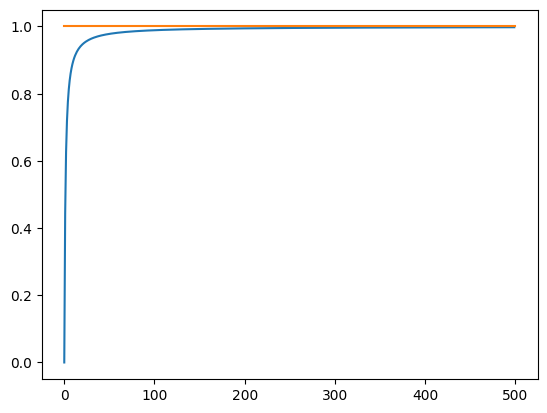

In [127]:
N = 500

plt.plot([Cat[n]/(4**n/sqrt(pi*n**3)) for n in range(N)])
plt.plot([0,N],[1,1],label='1')

plt.show()

With this asymptotics we are interested in the series 
$$
\sum_{n\geq 0} \frac{c_n}{4^n}
$$
We already know that this converges, because we have 

$$\frac{c_n}{4^n} \sim \frac{1}{\sqrt\pi n^{3/2}},~~ \text{and we know that} ~~ \sum_{n\geq0} \frac{1}{n^{3/2}}$$
converges, because $3/2 > 1$.

<div markdown=1 class="Prop">
Prove that the the value of the series is
$$
\sum_{n\geq0} \frac{c_n}{4^n} = 2.
$$

<div markdown=1 style="background-color: #f7b2eb; border-left: 5px solid #bf15a0; padding: 0.5em; color:#0A2A12; font-weight: bold;font-style: normal;"> 
Sympy Solution:

In [33]:
var('k')
Sum(catalan(k)/4**k, (k, 0, oo)).doit()

2

<div markdown=1 class="Answers"> 

We will admit the identity:

$$c_n = \frac{2}{\pi} 4^n \int_{-1}^1 t^{2n} \sqrt{1-t^2}dt,$$
then we can prove that

$$\sum_{n\geq0}\frac{c_n}{4^n} = \sum_{n\geq0} \frac{1}{4^n}\cdot \frac{2}{\pi} 4^n \int_{-1}^1 t^{2n} \sqrt{1-t^2}dt = \frac{2}{\pi} \int_{-1}^1 \sum_{n\geq0}t^{2n}\sqrt{1-t^2}dt = \frac{2}{\pi} \int_{-1}^1 \frac{1}{1-t^2}\sqrt{1-t^2}dt = \frac{2}{\pi}\int_{-1}^1 \frac{1}{\sqrt{1-t^2}}dt = \frac{2}{\pi}(\arcsin(1) - \arcsin(-1)) = 2.$$

There is also a probabilistic proof, which we won't cover due to the time constraint.

<a id="divisible"></a>
## Divisibility of Catalan numbers

<div markdown=1 class="Prop"> Prove that all odd Catalan numbers are when $n=2^k-1$, the rest is even.

In [34]:
def oddCatalan(N):
    L = []
    for n in range(N):
        if Cat[n] % 2 == 1:
            L.append(n)
    return L
bound = 2000
print(oddCatalan(bound))
print([2**k-1 for k in range(100) if 2**k-1 <= bound])

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]
[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]


<div markdown=1 class="Prop"> To see if the Catalan number is odd we will use the p-adic valuations of numbers

We define $\nu_p(n)$ to be the largest exponent of $p$ that divides $n$, i.e. if $k = \nu_p(n)$, then $p^k | n$, but $p^{k+1} \nmid n$.

By admitting the following property:

$\nu_p(n!) = n - s_p(n)$, where $s_p(n)$ is the sum of the digits of $n$ in base $p$.

Find all odd Catalan numbers.

<div markdown=1 class="Answers"> 

We can now notice that we can calculate the $2$-adic valuation of the Catalan numbers:

$$
\nu_2(c_n) = \nu_2\Big(\frac{1}{n+1}\binom{2n}{n}\Big) = \nu_2((2n)!) - \nu_2((n!)) - \nu_2((n+1)!) = 2n - s_2(2n) - (n - s_2(n)) - (n+1 - s_2(n+1)) = s_2(n+1) + s_2(n) - s_2(2n)
$$
We notice that the sum of digits of $n$ and $2n$ in base $2$ will be the same, thus $\nu_2(c_n) = s_2(n+1)-1$. And we see that if we want $c_n$ to be odd, then we need to have $\nu_2(c_n) = s_2(n+1) - 1= 0$, thus the sum of digits of $n+1$ in base $2$ must be equal to $1$. So $n = 2^k - 1$ for some integer $k$.

This also explains why we were encountering in the most part only even Catalan numbers.

<div markdown=1 class="Prop">
The only prime Catalan numbers are $2$ and $5$.

Due to the time constraint we won't give the proof, but there is an algorithm that supports this claim

In [35]:
def IsPrime(n):
    if n <= 1:
        return False
    d = 2
    while d * d <= n:
        if n % d == 0:
            return False
        d+=1
    return True

N = 500
for n in range(N):
    if IsPrime(Cat[n]):
        print(f'n = {n} : {Cat[n]}')

n = 2 : 2
n = 3 : 5


<a id="Miscellaneous"></a>
## Miscellaneous

<div markdown=1 class="Prop">

From the source https://www.sciencedirect.com/science/article/pii/S2346809218300758 we have that 

$$\sum_{n\geq0} \frac{1}{c_n} = 2 + \frac{4\sqrt3 \pi}{27}$$

More specifically:

$$\sum_{n\geq0} \frac{x^n}{c_n} = \frac{2(x+8)}{(4-x)^2} + \frac{24\sqrt x \arcsin(\frac{1}{2}\sqrt x)}{(4-x)^{5/2}}$$
This can be also found by SymPy:

In [36]:
var('n')

Sum(1/catalan(n), (n,0,oo)).doit()

4*sqrt(3)*pi/27 + 2

In [37]:
var('x n')

Sum(x**n/catalan(n), (n,0,oo)).doit()

Piecewise((3*sqrt(x)*asin(sqrt(x)/2)/(2*sqrt(1 - x/4)*(x**2/8 - x + 2)) + (x/4 + 2)/(x**2/8 - x + 2), Abs(x) < 4), (Sum(x**n/catalan(n), (n, 0, oo)), True))

<div markdown=1 class="Prop">
The matrix entry $c_n = (A^{2n})_{11}$, where $A = (a_{ij})_{i,j\geq1}$ is the tridiagonal matrix defined by $a_{i,i−1} = a_{i,i+1} = 1$, and $a_{ij} = 0$ otherwise

In [38]:
def MatrixCatalan(n):
    if n <= 0:
        return 1
    M = np.zeros((n+1, n+1))
    for i in range(1,n+1):
        M[i][i-1] = 1
    for i in range(n):
        M[i][i+1] = 1
    return (linalg.matrix_power(M,2*n))[0][0]

In [39]:
N = 30
for n in range(N):
    print(f'n = {n} : {MatrixCatalan(n) == Cat[n]}')

n = 0 : True
n = 1 : True
n = 2 : True
n = 3 : True
n = 4 : True
n = 5 : True
n = 6 : True
n = 7 : True
n = 8 : True
n = 9 : True
n = 10 : True
n = 11 : True
n = 12 : True
n = 13 : True
n = 14 : True
n = 15 : True
n = 16 : True
n = 17 : True
n = 18 : True
n = 19 : True
n = 20 : True
n = 21 : True
n = 22 : True
n = 23 : True
n = 24 : True
n = 25 : True
n = 26 : True
n = 27 : True
n = 28 : True
n = 29 : True


<a href="ref"></a>
# References

1. https://en.wikipedia.org/wiki/Catalan_number

2. https://math.mit.edu/~rstan/transparencies/china.pdf

3. https://www.sciencedirect.com/science/article/pii/S2346809218300758

4. https://math.mit.edu/~rstan/ec/catadd.pdf